# 2腕バンディット課題
2つの選択肢があり，どちらを行う方が得かを考える．



$$
P(a_{t+1} = A) \propto exp(\beta Q_t(A))) \\
P(a_{t+1} = B) \propto exp(\beta Q_t(B)))
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
sns.set_style('darkgrid')

In [ ]:
np.random.seed(seed=42)

In [ ]:
# 報酬(カード)の準備
A_cards = np.random.randint(0, 2000, 100)
B_cards = np.random.randint(0, 1000, 100)
steps = list(range(0, 100, 1))

In [ ]:
# A, Bのどちらを選択するか
def SelectAorB(pA, pB):
    if pA > pB:
        return 'A'
    elif pA < pB:
        return 'B'
    else:
        e = np.random.normal(loc=0, scale=1, size=1)
        if e >= 0:
            return 'A'
        else:
            return 'B'

In [ ]:
# 価値の更新
def UpdataValue(now_value, reward, alpha = 0.05):
    new_value = now_value + alpha*(reward - now_value)
    return new_value

In [ ]:
# 保存する変数の準備
# 予測した価値を保存する
A_value = np.zeros(100)
B_value = np.zeros(100)

# 選択肢を保存する変数
select_choice = [''] * 100

# 選択確率を保存する変数
A_prob = np.zeros(100)
B_prob = np.zeros(100)

In [ ]:
# 初期値
A_init = 500
B_init = 500

In [ ]:
# 係数
alpha = 0.05
beta = 0.004

In [ ]:
# 実行
for t in steps:
    if t == 0:
        A_tmp = math.exp(beta * A_init)
        B_tmp = math.exp(beta * B_init)
        if SelectAorB(A_tmp, B_tmp) == 'A':
            A_value[t] = UpdataValue(A_init, A_cards[t])
            B_value[t] = B_init
            select_choice[t] = 'A'
        else:
            B_value[t] = UpdataValue(B_init, B_cards[t])
            A_value[t] = A_init
            select_choice[t] = 'B'
    else:
        A_tmp = math.exp(beta * A_value[t-1])
        B_tmp = math.exp(beta * B_value[t-1])
        if SelectAorB(A_tmp, B_tmp) == 'A':
            A_value[t] = UpdataValue(A_value[t-1], A_cards[t])
            B_value[t] = B_value[t-1]
            select_choice[t] = 'A'
        else:
            B_value[t] = UpdataValue(B_value[t-1], B_cards[t])
            A_value[t] = A_value[t-1]
            select_choice[t] = 'B'
    A_prob[t] = A_tmp/(A_tmp+B_tmp)
    B_prob[t] = B_tmp/(A_tmp+B_tmp)

In [ ]:
A_prob

In [ ]:
# グラフ
fig, ax = plt.subplots()
ax.set_xlabel('step')
ax.set_ylabel('card')
ax.plot(steps, A_cards, color='red', label='A')
ax.plot(steps, B_cards, color='blue', label='B')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('step')
ax.set_ylabel('prob')
ax.plot(steps, A_prob, color='red', label='A')
ax.plot(steps, B_prob, color='blue', label='B')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('step')
ax.set_ylabel('value')
ax.plot(steps, A_value, color='red', label='A')
ax.plot(steps, B_value, color='blue', label='B')
plt.legend()
plt.show()

In [ ]:
sum([1 if sc == 'A' else 0 for sc in select_choice])

以上が2腕バンディット課題を解いた．
これを関数化する．

In [53]:
# A, Bのどちらを選択するか
def SelectAorB(pA, pB):
    if pA > pB:
        return 'A'
    elif pA < pB:
        return 'B'
    else:
        e = np.random.normal(loc=0, scale=1, size=1)
        if e >= 0:
            return 'A'
        else:
            return 'B'
        

# 価値の更新
def UpdataValue(now_value, reward, alpha = 0.05):
    new_value = now_value + alpha*(reward - now_value)
    return new_value

In [104]:
# 実行する関数
def TwoBandit(A_rewards, B_rewards, num):
    # 変数の準備
    A_value = np.zeros(num)
    B_value = np.zeros(num)
    select_choise = [''] * 100
    steps = list(range(0, num, 1))
    A_prob = np.zeros(num)
    B_prob = np.zeros(num)
    A_init = 500
    B_init = 500
    alpha = 0.05
    beta = 0.004
    # 実行
    for t in steps:
        if t == 0:
            A_tmp = math.exp(beta * A_init)
            B_tmp = math.exp(beta * B_init)
            if SelectAorB(A_tmp, B_tmp) == 'A':
                A_value[t] = UpdataValue(A_init, A_rewards[t])
                B_value[t] = B_init
                select_choice[t] = 'A'
            else:
                B_value[t] = UpdataValue(B_init, B_rewards[t])
                A_value[t] = A_init
                select_choice[t] = 'B'
        else:
            A_tmp = math.exp(beta * A_value[t-1])
            B_tmp = math.exp(beta * B_value[t-1])
            if SelectAorB(A_tmp, B_tmp) == 'A':
                A_value[t] = UpdataValue(A_value[t-1], A_rewards[t])
                B_value[t] = B_value[t-1]
                select_choice[t] = 'A'
            else:
                B_value[t] = UpdataValue(B_value[t-1], B_rewards[t])
                A_value[t] = A_value[t-1]
                select_choice[t] = 'B'
        A_prob[t] = A_tmp/(A_tmp+B_tmp)
        B_prob[t] = B_tmp/(A_tmp+B_tmp)
    
    # draw grph
    c1, c2 = 'red', 'blue'
    l1, l2 = 'A', 'B'
    fig, axs = plt.subplots(3, figsize=(12, 8))
    
    axs[0].set_xlabel('step')
    axs[0].set_ylabel('card')
    axs[0].plot(steps, A_rewards, color=c1, label=l1)
    axs[0].plot(steps, B_rewards, color=c2, label=l2)
    axs[0].legend()
    
    axs[1].set_xlabel('step')
    axs[1].set_ylabel('value')
    axs[1].set_ylim(0, max(max(A_rewards), max(B_rewards)))
    axs[1].plot(steps, A_value, color=c1, label=l1)
    axs[1].plot(steps, B_value, color=c2, label=l2)
    axs[1].legend()
    
    axs[2].set_xlabel('step')
    axs[2].set_ylabel('prob')
    axs[2].plot(steps, A_prob, color=c1, label=l1)
    axs[2].plot(steps, B_prob, color=c2, label=l2)
    axs[2].legend()
     
    plt.show()

    # Aを選択した回数を表示
    print(sum([1 if sc == 'A' else 0 for sc in select_choice]))
    


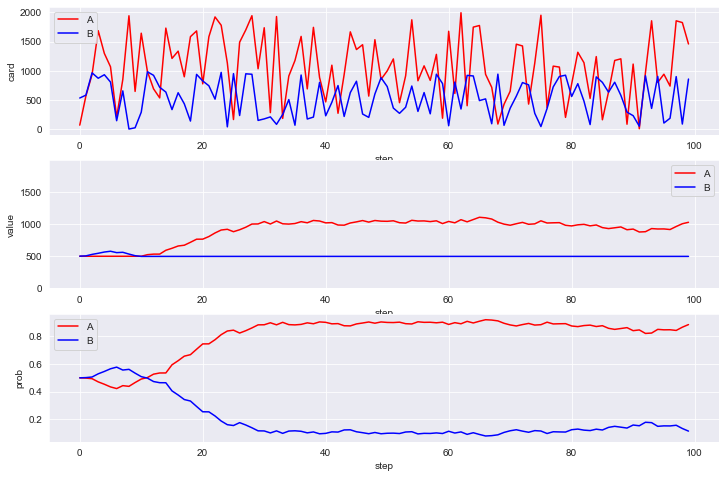

89


In [105]:
A_rewards = np.random.randint(0, 2000, 100)
B_rewards = np.random.randint(0, 1000, 100)
num = 100
TwoBandit(A_rewards, B_rewards, num)

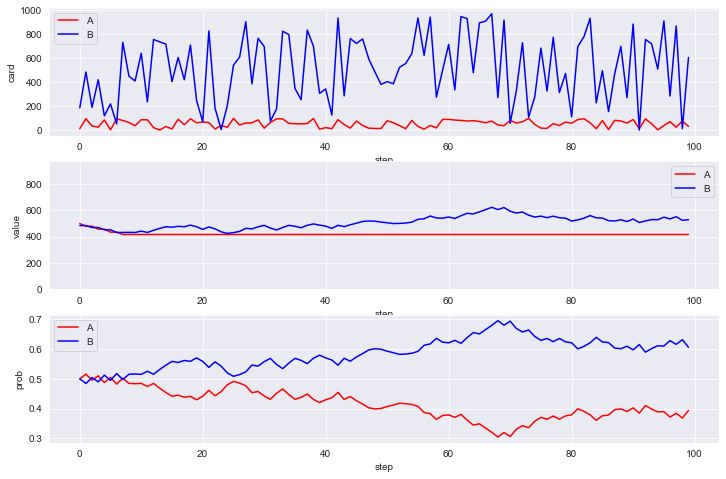

4


In [106]:
A_rewards = np.random.randint(0, 100, 100)
B_rewards = np.random.randint(0, 1000, 100)
num = 100
TwoBandit(A_rewards, B_rewards, num)

よくわからなくなったから一旦終了する．
バンディット問題はε-greedyアルゴリズムなどで解かれることが多いのでそれを一度考えてみる．